In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data = pd.read_csv('dataset.csv')

In [9]:
data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


**Permasalahan**

Porter adalah Pasar Logistik Dalam Kota Terbesar di India. Sebagai pemimpin di pasar logistik dalam kota senilai $40 miliar di negara ini, Porter berupaya meningkatkan taraf hidup lebih dari 1.50.000 mitra pengemudi dengan memberi mereka penghasilan dan kemandirian yang konsisten. Saat ini, perusahaan telah melayani 5+ juta pelanggan

Porter bekerja dengan berbagai restoran untuk mengantarkan barang-barang mereka langsung ke masyarakat.

Porter memiliki sejumlah mitra pengiriman yang tersedia untuk mengantarkan makanan, dari berbagai restoran dan ingin mendapatkan **perkiraan waktu pengiriman yang dapat diberikan kepada pelanggan berdasarkan apa yang mereka pesan, dari mana, dan juga mitra pengiriman**.

Kumpulan data ini memiliki data yang diperlukan untuk melatih model regresi yang akan melakukan:

**Estimasi waktu pengiriman, berdasarkan semua fitur tersebut**<br>

**Deskripsi tiap Fitur**

Setiap baris dalam file ini berhubungan dengan satu pengiriman unik yang berbeda dengan pengiriman lain. Setiap kolom berhubungan dengan fitur seperti yang dijelaskan di bawah ini :

market id: ID berbentuk tipe data integer untuk market dimana tempat restoran berada

created at: Waktu dimana sebuah order dilakukan

actual delivery time: Waktu dimana sebuah order diselesaikan

store_id: ID untuk store

store_primary_category: Kategori Restoran

order protocol: Kode berbentuk integer untuk order protocol(bagaimana ordernya dilakukan, seperti contoh : melalui porter, melalui panggilan telepon ke restoran, melalui booking, melalui pihak ketiga, dst.)

total_items: Jumlah item dalam sebuah order

subtotal: Harga akhir dari sebuah transaksi

num_distinct items: Jumlah item pesanan yang berbeda dalam sebuah order

min_item_price: Harga item termurah dalam sebuah order

max_item_price: Harga item termahal dalam sebuah order

total_onshift_partners: Jumlah kurir yang tersedia pada saat order dibuat

total_busy_partners: Jumlah kurir yang sedang melakukan delivery/pengantaran ketika order dibuat

total outstanding_orders: total jumlah order yang harus diselesaikan pada saat ini

**Fitur Target(variabel dependen) = 'delivery_duration'**<br>
Dalam analisa ini, dibutuhkan fitur baru yaitu 'delivery_duration', dimana ini adalah lama waktu dimulai saat order dibuat hingga selesainya  pengiriman. Fitur ini merupakan pengurangan antara value dari fitur 'actual_delivery_time'(waktu ketika order selesai/barang sampai ke konsumen) dengan fitur 'created_at'(waktu ketika order dibuat). Tanpa lupa, sebelumnya akan dilakukan konversi tipe data 2 buah fitur tersebut ke tipe data date-time.

**Fitur Pendukung(variabel independen):**<br>
Sesuai dengan yang telah dijabarkan diatas, dimana penelitian ini ditujukan untuk membuat model prediksi waktu pengiriman makanan berdasarkan :
1. Apa yang konsumen pesan(store_primary_category). Pada data dalam fitur ini dibutuhkan pengelompokan tipe makanan berdasarkan kategori restoran yang menjual makanan tersebut.
2. Dari mana makanan tersebut dipesan(market_id). Data dalam fitur ini berupa data integer yang menunjukan lokasi tempat restoran berada.
3. Mitra Pengiriman(order_protocol). Fitur ini memiliki data yang menjabarkan bagaimana order tersebut dilakukan(apakah melalui panggilan telepon,melalui aplikasi porter, dsb,)

# Preparation

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [11]:
# Memastikan tidak ada row yang terduplikasi
duplicated_rows_df = data[data.duplicated()]
print('Jumlah Baris yang terduplikat: ',duplicated_rows_df.shape)

Jumlah Baris yang terduplikat:  (0, 14)


In [12]:
# Mengganti dtype menjadi:

# Datetime
data.created_at = pd.to_datetime(data.created_at)
data.actual_delivery_time = pd.to_datetime(data.actual_delivery_time)

# Object
data.market_id = data.market_id.astype('object')
data.store_primary_category = data.store_primary_category.astype ('object')
data.order_protocol = data.order_protocol.astype('object')

In [13]:
# Mendeteksi Missing Values

print(f'Dataset dimensions\t: {data.shape}')

type_null = pd.DataFrame(data.dtypes).T.rename(index={0: 'Column Type'})
type_null = pd.concat([type_null, pd.DataFrame(data.isnull().sum()).T.rename(index={0: 'Amount of Null Values'})])
type_null = pd.concat([type_null, pd.DataFrame(round(data.isnull().sum()/data.shape[0]*100, 4)).T.rename(index={0: 'Percentage of Null Values'})])
type_null = type_null.T
type_null = type_null.reset_index().rename(columns={'index': 'feature'})
type_null

Dataset dimensions	: (197428, 14)


,feature,Column Type,Amount of Null Values,Percentage of Null Values
0,market_id,object,987,0.4999
1,created_at,datetime64[ns],0,0.0
2,actual_delivery_time,datetime64[ns],7,0.0035
3,store_id,object,0,0.0
4,store_primary_category,object,4760,2.411
5,order_protocol,object,995,0.504
6,total_items,int64,0,0.0
7,subtotal,int64,0,0.0
8,num_distinct_items,int64,0,0.0
9,min_item_price,int64,0,0.0


In [14]:
data.describe()

,created_at,actual_delivery_time,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,197428,197421,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2015-02-04 22:00:09.537962752,2015-02-04 22:48:23.348914432,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
min,2014-10-19 05:24:15,2015-01-21 15:58:11,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2015-01-29 02:32:42,2015-01-29 03:22:29,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,2015-02-05 03:29:09.500000,2015-02-05 04:40:41,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,2015-02-12 01:39:18.500000,2015-02-12 02:25:26,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,2015-02-18 06:00:44,2015-02-19 22:45:31,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000
std,NaN,NaN,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830


In [15]:
# Melakukan pengecekan data anomali

# Pengecekan anomali 1 : data yang memiliki value 0 atau lebih kecil dari 0 :
subtotal_zero = len(data[data["subtotal"] == 0])
perc_subtotal_zero = (len(data[data["subtotal"] == 0]) / len(data)) * 100

min_item_price_zero = len(data[data["min_item_price"] <= 0])
perc_min_item_price_zero = (len(data[data["min_item_price"] <= 0]) / len(data)) * 100

max_item_price_zero = len(data[data["max_item_price"] == 0])
perc_max_item_price_zero = (len(data[data["max_item_price"] == 0]) / len(data)) * 100

# Pengecekan anomali 2 : bila ada value kurir yang lebih kecil dari 0(bila tidak ada kurir) :
total_onshift_partners_zero = len(data[data["total_onshift_partners"] < 0])
perc_total_onshift_partners_zero = (len(data[data["total_onshift_partners"] < 0]) / len(data)) * 100

total_busy_partners_zero = len(data[data["total_busy_partners"] < 0])
perc_total_busy_partners_zero = (len(data[data["total_busy_partners"] < 0]) / len(data)) * 100

# Pengecekan anomali 3 : bila ada tidak ada order sama sekali :
total_outstanding_orders_zero = len(data[data["total_outstanding_orders"] < 0])
perc_total_outstanding_orders_zero = (len(data[data["total_outstanding_orders"] < 0]) / len(data)) * 100

print("The data consist of", str(subtotal_zero), "rows of data with total transaction equal to zero.")
print("About {:.2f}% of total data".format(perc_subtotal_zero))
print("")
print("The data consist of", str(min_item_price_zero), "rows of data with min item price quantity less/equal than zero.")
print("About {:.2f}% of total data".format(perc_min_item_price_zero))
print("")
print("The data consist of", str(max_item_price_zero), "rows of data with max item price equal to zero.")
print("About {:.2f}% of total data".format(perc_max_item_price_zero))
print("")
print("The data consist of", str(total_onshift_partners_zero), "rows of data with current online Porter Partners that is less than zero.")
print("About {:.2f}% of total data".format(perc_total_onshift_partners_zero))
print("")
print("The data consist of", str(total_busy_partners_zero), "rows of data with total busy Porter Partners that is less than zero.")
print("About {:.2f}% of total data".format(perc_total_busy_partners_zero))
print("")
print("The data consist of", str(total_outstanding_orders_zero), "rows of data with current ongoing orders less than zero.")
print("About {:.2f}% of total data".format(perc_total_outstanding_orders_zero))

The data consist of 179 rows of data with total transaction equal to zero.
About 0.09% of total data

The data consist of 2552 rows of data with min item price quantity less/equal than zero.
About 1.29% of total data

The data consist of 7 rows of data with max item price equal to zero.
About 0.00% of total data

The data consist of 21 rows of data with current online Porter Partners that is less than zero.
About 0.01% of total data

The data consist of 21 rows of data with total busy Porter Partners that is less than zero.
About 0.01% of total data

The data consist of 44 rows of data with current ongoing orders less than zero.
About 0.02% of total data


In [16]:
# Melakukan penghapusan data dengan anomali agar analisisnya menjadi lebih relevan :
# (copy it first)
dataset = data.copy()
dataset = dataset[
    (dataset['subtotal'] > 0) &
    (dataset['min_item_price'] > 0) &
    (dataset['max_item_price'] > 0) &
    (dataset['total_onshift_partners'] >= 0) &
    (dataset['total_busy_partners'] >= 0) &
    (dataset['total_outstanding_orders'] >= 0)
    ]

# Menghilangkan kolom/variabel yang tidak relevan
dataset.drop(labels=['store_id'], axis=1, inplace=True)

In [17]:
# Menambahkan kolom/variabel 'delivery_duration'.
# Fitur ini merupakan pengurangan antara value dari fitur
# 'actual_delivery_time'(waktu ketika order selesai/barang sampai ke konsumen) dengan fitur 'created_at'(waktu ketika order dibuat).

dataset['delivery_duration'] = (dataset['actual_delivery_time'] - dataset['created_at']).dt.total_seconds()/60

# Exploratory Data Analysis

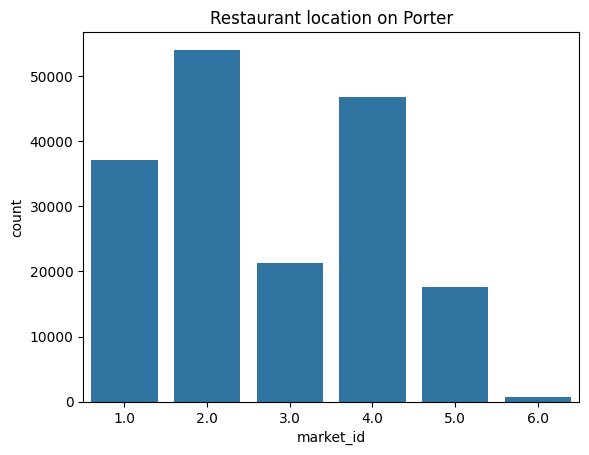

In [18]:
# market_id proportion
sns.countplot(x='market_id', data=dataset)
plt.title('Restaurant location on Porter')
plt.show()

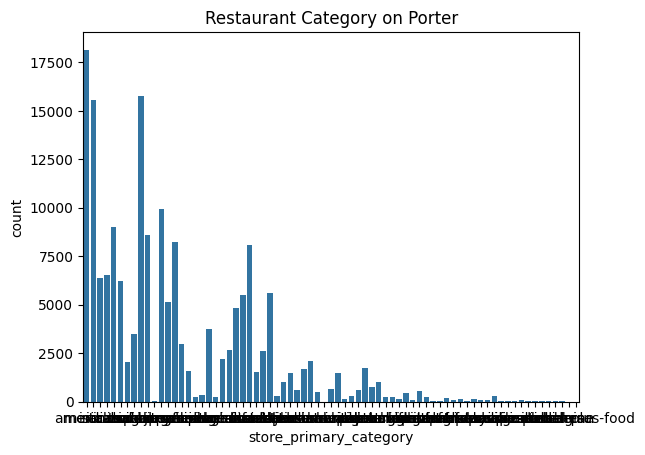

In [19]:
# store_primary_category proportion
sns.countplot(x='store_primary_category', data=dataset)
plt.title('Restaurant Category on Porter')
plt.show()

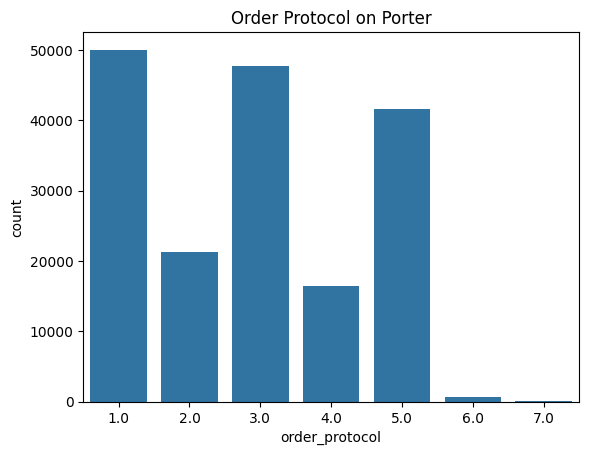

In [20]:
# order_protocol proportion
sns.countplot(x='order_protocol', data=dataset)
plt.title('Order Protocol on Porter')
plt.show()

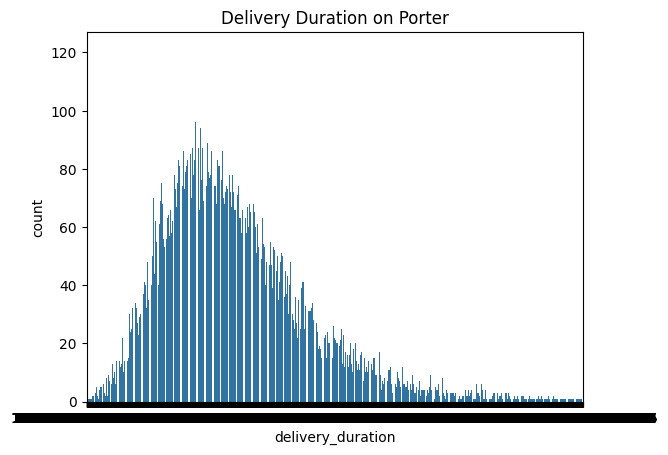

In [21]:
# delivery_duration proportion
sns.countplot(x='delivery_duration', data=dataset)
plt.title('Delivery Duration on Porter')
plt.show()

In [22]:
# Melihat keunikan data dari fitur store_primary_category
print(dataset['store_primary_category'].unique())

['american' 'mexican' nan 'indian' 'italian' 'sandwich' 'thai' 'cafe'
 'salad' 'pizza' 'chinese' 'singaporean' 'burger' 'mediterranean'
 'japanese' 'greek' 'catering' 'filipino' 'convenience-store' 'other'
 'vegan' 'asian' 'barbecue' 'breakfast' 'fast' 'dessert' 'smoothie'
 'seafood' 'vietnamese' 'cajun' 'steak' 'middle-eastern' 'persian'
 'korean' 'sushi' 'latin-american' 'chocolate' 'burmese' 'hawaiian'
 'british' 'nepalese' 'pasta' 'alcohol' 'vegetarian' 'dim-sum' 'peruvian'
 'turkish' 'ethiopian' 'bubble-tea' 'german' 'french' 'caribbean'
 'gluten-free' 'comfort-food' 'gastropub' 'afghan' 'pakistani' 'moroccan'
 'tapas' 'malaysian' 'soup' 'brazilian' 'european' 'cheese' 'african'
 'argentine' 'kosher' 'irish' 'spanish' 'russian' 'southern' 'lebanese'
 'belgian' 'alcohol-plus-food']


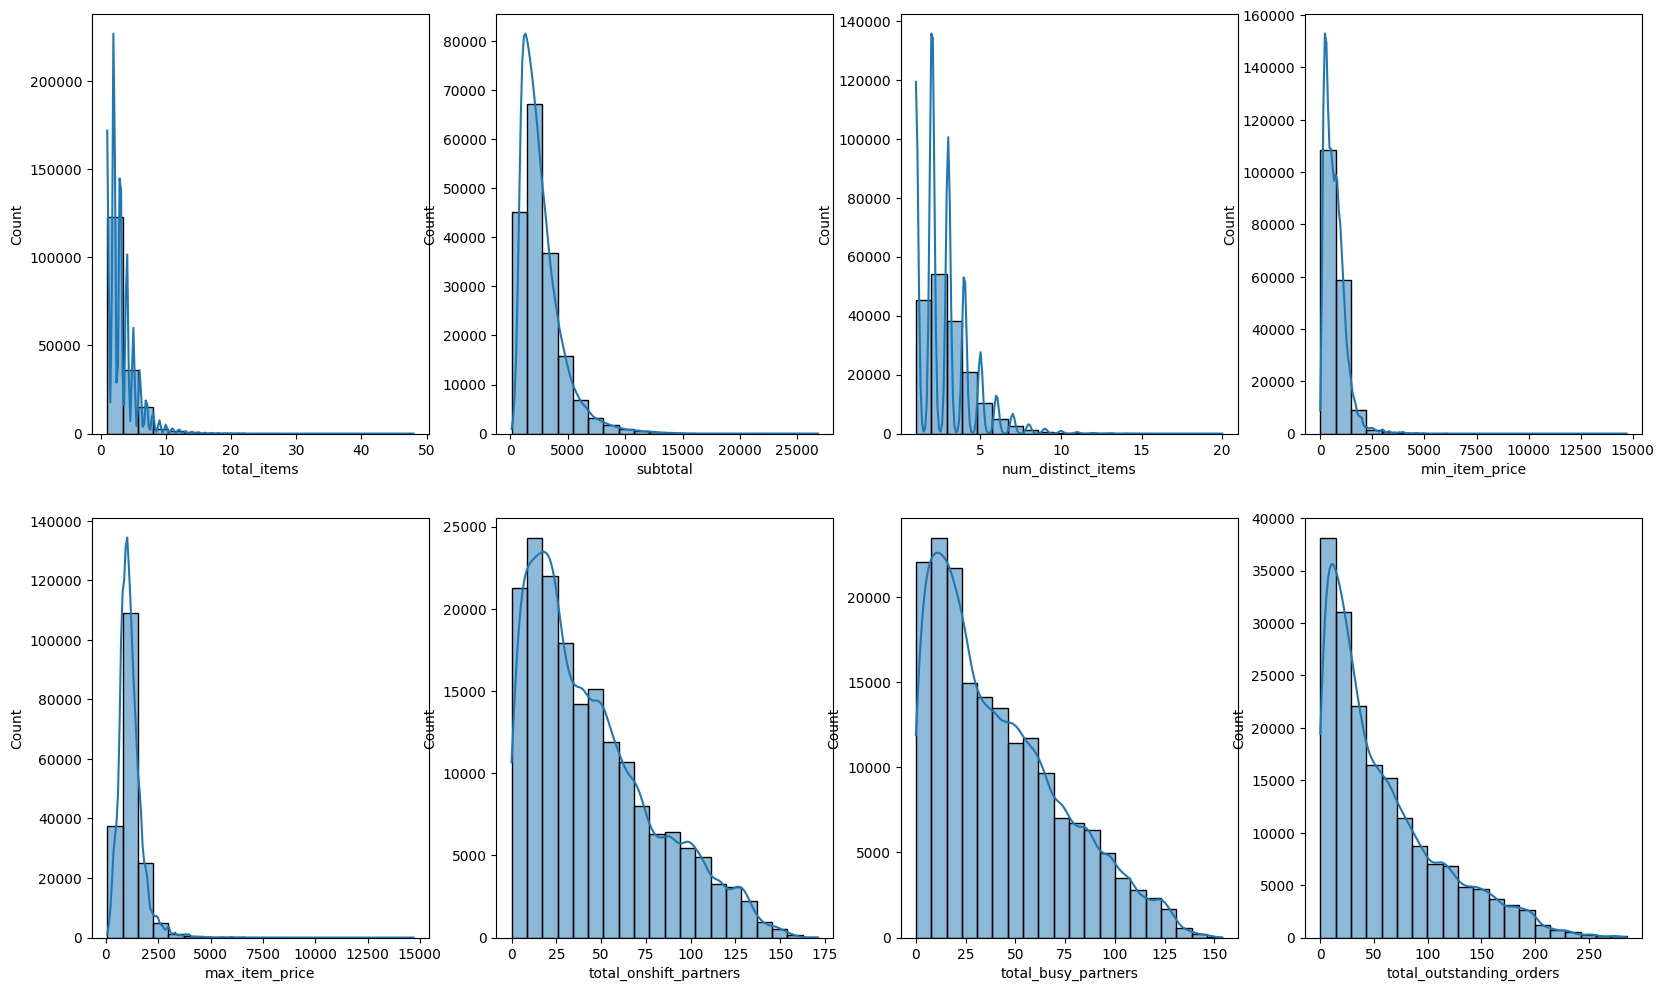

In [23]:
# Melakukan plot histogram untuk masing-masing variabel

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(20, 12))

# Plot histograms for each variable
sns.histplot(ax=ax1, x='total_items', data=dataset, kde=True, bins=20)
sns.histplot(ax=ax2, x='subtotal', data=dataset, kde=True, bins=20)
sns.histplot(ax=ax3, x='num_distinct_items', data=dataset, kde=True, bins=20)
sns.histplot(ax=ax4, x='min_item_price', data=dataset, kde=True, bins=20)
sns.histplot(ax=ax5, x='max_item_price', data=dataset, kde=True, bins=20)
sns.histplot(ax=ax6, x='total_onshift_partners', data=dataset, kde=True, bins=20)
sns.histplot(ax=ax7, x='total_busy_partners', data=dataset, kde=True, bins=20)
sns.histplot(ax=ax8, x='total_outstanding_orders', data=dataset, kde=True, bins=20)


plt.show()

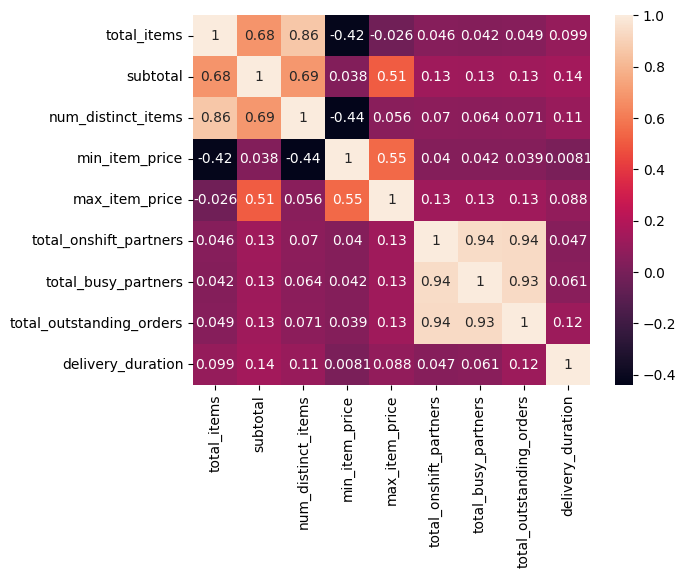

In [24]:
# Melihat Korelasi antar variabel

corr_cols= ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
            'max_item_price', 'total_onshift_partners', 'total_busy_partners',
            'total_outstanding_orders', 'delivery_duration']

sns.heatmap(data=dataset[corr_cols].corr(), annot=True)
plt.show()

# Data Preprocessing

In [25]:
# Copy data
data_prepro = dataset.copy()

In [26]:
# Mendeteksi kembali Missing Values
data_prepro.isna().sum()

market_id                    911
created_at                     0
actual_delivery_time           7
store_primary_category      4182
order_protocol               911
total_items                    0
subtotal                       0
num_distinct_items             0
min_item_price                 0
max_item_price                 0
total_onshift_partners         0
total_busy_partners            0
total_outstanding_orders       0
delivery_duration              7
dtype: int64

In [27]:
data_prepro.dropna(subset=['actual_delivery_time'], inplace=True)

# Imputasi terhadap market_id, store_primary_category, order_protocol dengan metode MODUS
# Metode Modus adalah metode imputasi terbaik untuk tipe data kategorikal

data_prepro['market_id'].fillna(data_prepro['market_id'].mode()[0], inplace=True)

data_prepro['store_primary_category'].fillna(data_prepro['store_primary_category'].mode()[0], inplace=True)

data_prepro['order_protocol'].fillna(data_prepro['order_protocol'].mode()[0], inplace=True)

In [28]:
# Mengelompokan data dalam kolom store_primary_category menjadi berbagai tipe restoran

def restaurant_category (store_primary_category):
  ethnic_based_restaurant = ['american','mexican','indian','italian','thai',
                             'chinese','singaporean','japanese','greek','filipino',
                             'asian','vietnamese','middle-eastern','persian',
                             'korean','latin-american','burmese','hawaiian',
                             'british','nepalese','peruvian','turkish','ethiopian',
                             'german','french','caribbean','afghan','pakistani',
                             'moroccan','malaysian','brazilian','european','african',
                             'argentine','irish','spanish','russian','southern',
                             'lebanese','belgian','mediterranean','cajun']

  specialize_food_restaurant = ['sandwich','salad','pizza','burger','barbecue',
                                'dessert','smoothie','seafood','steak','sushi',
                                'chocolate','pasta','alcohol','dim-sum','bubble-tea',
                                'tapas','soup','cheese']

  dietary_based_restaurant = ['vegan','vegetarian','gluten-free','kosher']

  other = ['cafe','catering','convenience-store','other','fast','breakfast',
           'comfort-food','gastropub','alcohol-plus-food']

  if store_primary_category in ethnic_based_restaurant:
    return 'Ethnic Based Food'
  elif store_primary_category in specialize_food_restaurant:
    return 'Specialize Food'
  elif store_primary_category in dietary_based_restaurant:
    return 'Dietary Based Food'
  elif store_primary_category in other:
    return 'Others'

# Mengaplikasikan kategori restoran tersebut kedalam fitur 'store_primary_category'
data_prepro.loc[: ,'restaurant_category'] = data_prepro['store_primary_category'].apply(restaurant_category)

In [29]:
# Memberikan penamaan ulang terhadap values dalam fitur order_protocol & market_id

# Dari sumber data, penamaan valus dalam fitur 'order_protocol' adalah sebagai berikut:
data_prepro.loc[:, 'order_protocol'] = data_prepro.loc[:, 'order_protocol'].replace({
    1.0 : 'Porter',
    2.0 : 'Call to Restaurant',
    3.0 : 'Pre-booked',
    4.0 : 'Third Party',
    5.0 : 'Others',
    6.0 : 'Others',
    7.0 : 'Others'
})

# Dari sumber data, penamaan valus dalam fitur 'market_id' adalah sebagai berikut:
data_prepro.loc[:, 'market_id'] = data_prepro.loc[:, 'market_id'].replace({
    1.0 : 'Region 1',
    2.0 : 'Region 2',
    3.0 : 'Region 3',
    4.0 : 'Region 4',
    5.0 : 'Region 5',
    6.0 : 'Region 6'
})

In [30]:
data_prepro

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_duration,restaurant_category
0,Region 1,2015-02-06 22:24:17,2015-02-06 23:27:16,american,Porter,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,Ethnic Based Food
1,Region 2,2015-02-10 21:49:25,2015-02-10 22:56:29,mexican,Call to Restaurant,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,Ethnic Based Food
2,Region 3,2015-01-22 20:39:28,2015-01-22 21:09:09,american,Porter,1,1900,1,1900,1900,1.0,0.0,0.0,29.683333,Ethnic Based Food
3,Region 3,2015-02-03 21:21:45,2015-02-03 22:13:00,american,Porter,6,6900,5,600,1800,1.0,1.0,2.0,51.250000,Ethnic Based Food
4,Region 3,2015-02-15 02:40:36,2015-02-15 03:20:26,american,Porter,3,3900,3,1100,1600,6.0,6.0,9.0,39.833333,Ethnic Based Food
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,Region 1,2015-02-17 00:19:41,2015-02-17 01:24:48,fast,Third Party,3,1389,3,345,649,17.0,17.0,23.0,65.116667,Others
197424,Region 1,2015-02-13 00:01:59,2015-02-13 00:58:22,fast,Third Party,6,3010,4,405,825,12.0,11.0,14.0,56.383333,Others
197425,Region 1,2015-01-24 04:46:08,2015-01-24 05:36:16,fast,Third Party,5,1836,3,300,399,39.0,41.0,40.0,50.133333,Others
197426,Region 1,2015-02-01 18:18:15,2015-02-01 19:23:22,sandwich,Porter,1,1175,1,535,535,7.0,7.0,12.0,65.116667,Specialize Food


In [31]:
# Import ML Data Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Melakukan Encoding untuk : market_id, store_primary_category, order_protocol
data_prepro_new = data_prepro.copy()

columns = data_prepro_new.select_dtypes(include=['object']).columns.to_list()

label_encoding = LabelEncoder()

# encode the data into a label
for i in columns:
  data_prepro_new[i] = label_encoding.fit_transform(data_prepro_new[i])

In [33]:
# Melakukan skala Minmaxscal
data_minmax = data_prepro_new.copy()

data_minmax.drop(labels=['created_at', 'actual_delivery_time'], axis=1, inplace=True)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_minmax)

# Mengkonversikan kembali data yang terskala ke dataframe
minmax_data = pd.DataFrame(scaled_data, columns=data_minmax.columns)
minmax_data

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_duration,restaurant_category
0,0.0,0.055556,0.5,0.063830,0.125295,0.157895,0.037826,0.080533,0.192982,0.090909,0.073684,0.009840,0.333333
1,0.2,0.638889,0.0,0.000000,0.067590,0.000000,0.095177,0.091530,0.005848,0.012987,0.007018,0.010496,0.333333
2,0.4,0.055556,0.5,0.000000,0.067590,0.000000,0.129192,0.125683,0.005848,0.000000,0.000000,0.004495,0.333333
3,0.4,0.055556,0.5,0.106383,0.254821,0.210526,0.040751,0.118852,0.005848,0.006494,0.007018,0.007957,0.333333
4,0.4,0.055556,0.5,0.042553,0.142483,0.105263,0.074767,0.105191,0.035088,0.038961,0.031579,0.006124,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178683,0.0,0.388889,1.0,0.042553,0.048455,0.105263,0.023403,0.040232,0.099415,0.110390,0.080702,0.010183,0.666667
178684,0.0,0.388889,1.0,0.106383,0.109156,0.157895,0.027485,0.052254,0.070175,0.071429,0.049123,0.008781,0.666667
178685,0.0,0.388889,1.0,0.085106,0.065194,0.105263,0.020342,0.023156,0.228070,0.266234,0.140351,0.007777,0.666667
178686,0.0,0.805556,0.5,0.000000,0.040442,0.000000,0.036329,0.032445,0.040936,0.045455,0.042105,0.010183,1.000000


# Modelling

Dalam tahapan ini, kita melakukan MinMax Scaling terlebih dahulu pada fitur-fitur (X_train dan X_test) untuk memastikan bahwa rentang nilai dari setiap fitur adalah antara 0 dan 1. Setelah itu, kita melakukan pelatihan model-model regresi menggunakan data pelatihan yang sudah di-scaling (X_train_scaled dan y_train).

## Model Training dengan MinMaxScaler

In [34]:
# Variabel independen (fitur)
X = minmax_data.drop(columns=['delivery_duration'])

# Variabel dependen (target)
y = minmax_data['delivery_duration']

# Pisahkan data menjadi data pelatihan (training) dan data uji (testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MinMax Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Tahap Pelatihan dengan Model-model Regresi

### Linear Regression

In [35]:
# 1. Linear Regression
from sklearn.linear_model import LinearRegression

# Inisialisasi model Linear Regression
linear_reg = LinearRegression()

# Pelatihan model dengan data pelatihan yang sudah di-scaling
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

### SVR (Support Vector Regression)

In [36]:
# 2. SVR (Support Vector Regression)
from sklearn.svm import SVR

# Inisialisasi model SVR
svr_reg = SVR()

# Pelatihan model dengan data pelatihan yang sudah di-scaling
svr_reg.fit(X_train_scaled, y_train)

SVR()

### XGB

In [38]:
# 4. XGB Regression
from xgboost import XGBRegressor

# Inisialisasi model XGB Regression
xgb_reg = XGBRegressor()

# Pelatihan model dengan data pelatihan yang sudah di-scaling
xgb_reg.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### KNN

In [39]:
# 5. KNeighbors Regression
from sklearn.neighbors import KNeighborsRegressor

# Inisialisasi model KNeighbors Regression
knn_reg = KNeighborsRegressor()

# Pelatihan model dengan data pelatihan yang sudah di-scaling
knn_reg.fit(X_train_scaled, y_train)

KNeighborsRegressor()

# Model Evaluation

Dalam tahapan evaluasi ini, kita menggunakan berbagai metrik evaluasi seperti Mean Squared Error (MSE), Mean Absolute Error (MAE), dan R-squared Score (R^2) untuk mengevaluasi performa relatif dari masing-masing model. Semakin rendah nilai MSE dan MAE, serta semakin tinggi nilai R^2, maka performa model dianggap semakin baik.

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## Evaluasi Model Linear Regression

In [41]:
# 1. Evaluasi model Linear Regression
y_pred_linear = linear_reg.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Menampilkan hasil evaluasi
print("Evaluation Metrics for Linear Regression:")
print("MSE:", mse_linear)
print("MAE:", mae_linear)
print("R^2 Score:", r2_linear)
print()


Evaluation Metrics for Linear Regression:
MSE: 7.5254002807021515e-06
MAE: 0.0019662559631801945
R^2 Score: 0.15993579025755322



## Evaluasi Model SVR

In [42]:
# 2. Evaluasi model SVR
y_pred_svr = svr_reg.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Menampilkan hasil evaluasi
print("Evaluation Metrics for SVR:")
print("MSE:", mse_svr)
print("MAE:", mae_svr)
print("R^2 Score:", r2_svr)
print()

Evaluation Metrics for SVR:
MSE: 0.006953028183821053
MAE: 0.08326233454240951
R^2 Score: -775.1700253389848



## Evaluasi Model XGB

In [43]:
# 4. Evaluasi model XGB Regression
y_pred_xgb = xgb_reg.predict(X_test_scaled)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Menampilkan hasil evaluasi
print("Evaluation Metrics for XGB Regression:")
print("MSE:", mse_xgb)
print("MAE:", mae_xgb)
print("R^2 Score:", r2_xgb)
print()

Evaluation Metrics for XGB Regression:
MSE: 9.234656659889137e-06
MAE: 0.0018679308905265566
R^2 Score: -0.030869357092692118



## Evaluasi Model KNN

In [44]:
# 5. Evaluasi model KNeighbors Regression
y_pred_knn = knn_reg.predict(X_test_scaled)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Menampilkan hasil evaluasi
print("Evaluation Metrics for KNeighbors Regression:")
print("MSE:", mse_knn)
print("MAE:", mae_knn)
print("R^2 Score:", r2_knn)

Evaluation Metrics for KNeighbors Regression:
MSE: 1.1174144691669817e-05
MAE: 0.002043885450047738
R^2 Score: -0.24737537935716492


# Model Tuning

## Tuning Model Linear Regression

In [46]:
# 1. Tuning Model Linear Regression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Inisialisasi model Linear Regression
lin_reg = LinearRegression()

# Daftar hyperparameter yang akan ditelusuri (kosong karena Linear Regression tidak memiliki hyperparameter yang bisa ditelusuri)
param_grid_lin_reg = {}

# Grid Search untuk mencari model terbaik
grid_search_lin_reg = GridSearchCV(estimator=lin_reg, param_grid=param_grid_lin_reg, scoring='neg_mean_squared_error', cv=5)
grid_search_lin_reg.fit(X_train_scaled, y_train)

# Mendapatkan model terbaik
lin_reg_best_model = grid_search_lin_reg.best_estimator_

# Menampilkan parameter terbaik
print("Parameter terbaik Linear Regression:", grid_search_lin_reg.best_params_)


Parameter terbaik Linear Regression: {}


## Tuning Model SVR

In [49]:
# 2. Tuning Model SVR
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Inisialisasi model SVR
svr = SVR()

# Daftar hyperparameter yang akan ditelusuri
param_grid_svr = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1, 'auto']}

# Grid Search untuk mencari model terbaik
grid_search_svr = GridSearchCV(estimator=svr, param_grid=param_grid_svr, scoring='neg_mean_squared_error', cv=5)
grid_search_svr.fit(X_train_scaled, y_train)

# Mendapatkan model terbaik
svr_best_model = grid_search_svr.best_estimator_

# Menampilkan parameter terbaik
print("Parameter terbaik SVR:", grid_search_svr.best_params_)

Parameter terbaik SVR: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


## Tuning Model XGB

In [47]:
# 4. Tuning Model XGB Regression

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Inisialisasi model XGB Regression
xgb_reg = XGBRegressor()

# Daftar hyperparameter yang akan ditelusuri
param_grid_xgb_reg = {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}

# Grid Search untuk mencari model terbaik
grid_search_xgb_reg = GridSearchCV(estimator=xgb_reg, param_grid=param_grid_xgb_reg, scoring='neg_mean_squared_error', cv=5)
grid_search_xgb_reg.fit(X_train_scaled, y_train)

# Mendapatkan model terbaik
xgb_reg_best_model = grid_search_xgb_reg.best_estimator_

# Menampilkan parameter terbaik
print("Parameter terbaik XGB Regression:", grid_search_xgb_reg.best_params_)

Parameter terbaik XGB Regression: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


## Tuning Model KNN

In [48]:
# 5. Tuning Model KNeighbor Regression

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Inisialisasi model KNeighbor Regression
knn_reg = KNeighborsRegressor()

# Daftar hyperparameter yang akan ditelusuri
param_grid_knn_reg = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# Grid Search untuk mencari model terbaik
grid_search_knn_reg = GridSearchCV(estimator=knn_reg, param_grid=param_grid_knn_reg, scoring='neg_mean_squared_error', cv=5)
grid_search_knn_reg.fit(X_train_scaled, y_train)

# Mendapatkan model terbaik
knn_reg_best_model = grid_search_knn_reg.best_estimator_

# Menampilkan parameter terbaik
print("Parameter terbaik KNeighbor Regression:", grid_search_knn_reg.best_params_)

Parameter terbaik KNeighbor Regression: {'algorithm': 'brute', 'n_neighbors': 7, 'weights': 'uniform'}


**Analisis**:<br>

**Mean Squared Error (MSE) dan Mean Absolute Error (MAE)**:<br>
Metrik ini mengukur seberapa dekat prediksi dengan nilai aktual. Semakin kecil nilainya, semakin baik.

**R^2 Score**:<br>
Metrik ini menunjukkan seberapa baik model menjelaskan variabilitas data. Nilai R^2 yang mendekati 1 menunjukkan model yang baik, sementara nilai negatif menunjukkan model yang buruk.

Berdasarkan metrik ini, berikut adalah penilaiannya:<br>

1. **Linear Regression** memiliki MSE dan MAE yang rendah serta R^2 yang positif, yang menunjukkan performa yang relatif baik.<br>
2. **SVR** memiliki MSE dan MAE yang tinggi serta R^2 yang sangat negatif, yang menunjukkan performa yang buruk.<br>
4. **XGBoost Regression** memiliki MSE dan MAE yang rendah serta R^2 yang positif, meskipun lebih rendah dari Linear Regression.<br>
5. **KNeighbors Regression** memiliki MSE dan MAE yang lebih tinggi dari Linear Regression dan XGBoost Regression, serta R^2 yang negatif.<br>

Kesimpulan:<br>
Berdasarkan hasil evaluasi di atas, Linear Regression dan XGBoost Regression adalah kandidat terbaik karena memiliki MSE dan MAE yang rendah serta R^2 yang positif. Namun, Linear Regression memiliki R^2 yang lebih tinggi dibandingkan dengan XGBoost Regression. Oleh karena itu, **Linear Regression** tampaknya menjadi model terbaik untuk digunakan dalam prediksi waktu berdasarkan hasil evaluasi yang kita miliki.







Dengan demikian, untuk model Linear Regression:<br>

- MSE: 7.5254002807021515e-06
- MAE: 0.0019662559631801945
- R^2 Score: 0.159935790257553223

# Model Deployment

In [51]:
# Menyimpan model ke pickle

import pickle
pickle.dump(LinearRegression, open("linear_regression_model.pkl", "wb"))

In [52]:
# Menginstall pyngrok
!pip install pyngrok

In [53]:
#Menggunakan Flask
from flask import Flask
from flask import jsonify, request
from pyngrok import ngrok
from datetime import datetime


app = Flask(__name__)

# Memuat model dari file pickle
with open("linear_regression_model.pkl", "rb") as file:
    model = pickle.load(file)

# Mendefinisikan route untuk prediksi
@app.route("/predict", methods=["POST"])
def predict():
    # Mengambil data JSON dari permintaan API
    data = request.get_json()

    # Melakukan prediksi menggunakan model yang dimuat
    prediction = model.predict(data)

    # Menyimpan data testing atau data baru yang masuk untuk mentraining ulang model
    with open("data_collection.txt", "a") as file2:
        file2.write("%s\n" % data)

    # Mengembalikan prediksi sebagai respons JSON
    return jsonify({"Status": "Success", "prediction": str(prediction[0])})

if __name__ == "__main__":
    # Menghubungkan ke server ngrok untuk mendapatkan URL publik
    ngrok.set_auth_token("2e5s3iq7c7npbyBmUX2RwoOAPSk_5z4AdvcqquuSR4MDwhRDW")
    ngrok_tunnel = ngrok.connect(5000)
    print("Public URL:", ngrok_tunnel.public_url)

    # Menjalankan Flask API
    app.run()

Public URL: https://6d9a-34-106-210-150.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [18/May/2024 10:51:59] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [18/May/2024 10:52:00] "GET /favicon.ico HTTP/1.1" 404 -
